# Some AI Recaps from the Teacher's Experience

1) **Keras** is the best framework to start Deep Learning because it is simple, effective and it has just Deep Learning Models and anything else inside. This way you can understand the difference between Deep Learning and the wider world of Machine Learning which is bigger and older than Deep Learning as in the following Venn Diagram: 

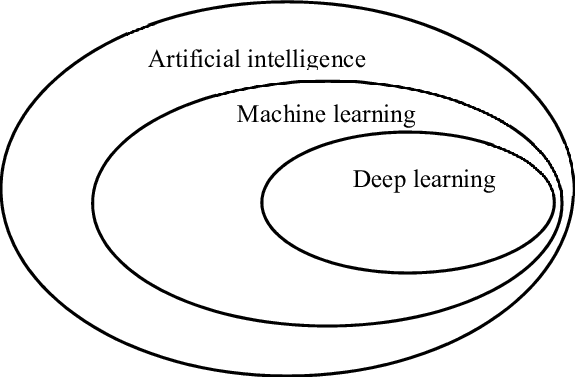

2) What is the difference between Artificial Intelligence, Machine Learning and Deep Learning? 
Briefly, **Artificial Intelligence** (AI) includes all the systems and hardware/software agents which display a Smart behaviour but they are not necessarily learning anything from the environment (no training set), for instance: planning robotics (robots programmed with heuristics, i.e. obstacle avoidance of a rover on mars); **Machine Learning** (ML) includes all agents learning from an Experience **E** (training set) a Task **T** with a Performance **P**, and they are evaluated with a Metrics **M** on a test set. Machine Learning models and agents are AI since after training/learning stage they display a Smart behaviour (from a human perspective), so ML is a subset of AI. Finally, Deep Learning includes all Machine Learning agents which learn from a Training Set by exploiting the power of Deep Artificial Neural Networks (DNNs). 

# Some Keras Recaps from the Teacher's Experience

1) **batch_size** : is the number of data rows that we want to send to the GPU (Graphics Processing Unit) at each iteration. The born of Gradient Descent with mini-batches was due to the fact that GPUs have not a huge RAM memory, so we needed to send batches of Big Data to them. From this **Stochastic Gradient Descent** was born, because every batch determins a small deviation in the traditional grandient descent (processed on the whole Dataset and not the batches), this small deviation is different from every epoch, that's why we need many epochs, because every of these path is different and probabilistic (stochastic). Batch size become an hyperparameter for the training stage, and we can set it whatever we want for the test stage (it depends on the GPU memory).   

2) **learning** **rate** : we may say that learning rate is the resolution of the Training Algorithm (SGD, Adam, Rmsprop, etc..) since it represents the step of weights updating. 

a) **Upside** of a big learning rate is quick convergence since it descend fastly towards the minimum, **downside** is that the training stage may be stuck far from the minimum, jumping around since it has not the right resolution to achieve it.

b) **Upside** of a small learning rate is a more sure convergence since the SGD *cursor* has the right resolution to achieve the minimum. **Downside** the SGD may not achieve the minimum at all. 

That's why when sometimes **Adam** is stuck to a local minumum we need to decrease learning rate, in order to increase training algorithm resolution and achieve a lower local minumum. 



# Some Convolutional Neural Networks Optimizations from the Teacher's Experience

1) Number of **Filters** (**Kernels**): must be many for understanding input images from different standpoints, but they cannot be too much to not explode the space search in gradient descent. Every layer should have the double of filters of the previous layer. 

# All General Imports

In [27]:
import os
import pdb            # Python Debugger
import cv2            # OpenCV
import numpy as np

import warnings

with warnings.catch_warnings():
    warnings.filterwarnings("ignore",category=DeprecationWarning)     # Sometimes Tensorflow can be very verbose on deprecated keras methods

# All Machine Learning Imports (Keras, Scikit Learn, etc..) 

In [28]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array

from sklearn.model_selection import train_test_split
from skimage.transform import resize


# All Globals

In [29]:
proxy = False
proxy_server = "http://proxy.istat.it:3128"
default_callbacks = []
epochs = 100
batch_size = 8
data_augmentation = False
full_model_trainable = True
depth = 3
show_dataset = False

data_type = 'float32'
#data_type = 'float16'

pre_trained = True
#neural_model = 'Xception'
#neural_model = 'VGG16'
#neural_model = 'VGG19'
#neural_model = 'ResNet50'
neural_model = 'MobileNet'
#neural_model = 'InceptionResNetV2'

# All Functions Definitions


In [30]:
def resize_image_arr(img_arr, height, width):           # img_arr is of shape (n, h, w, c)
    x_resized_list = []
    for i in range(img_arr.shape[0]):
        img = img_arr[i]
        resized_img = cv2.resize(img, (height, width))
        x_resized_list.append(resized_img)
    return np.stack(x_resized_list)

# All Classes Definition

In keras there are a lot of computer vision models built-in, with different number of parameters, layers and accuracy on Imagenet competition

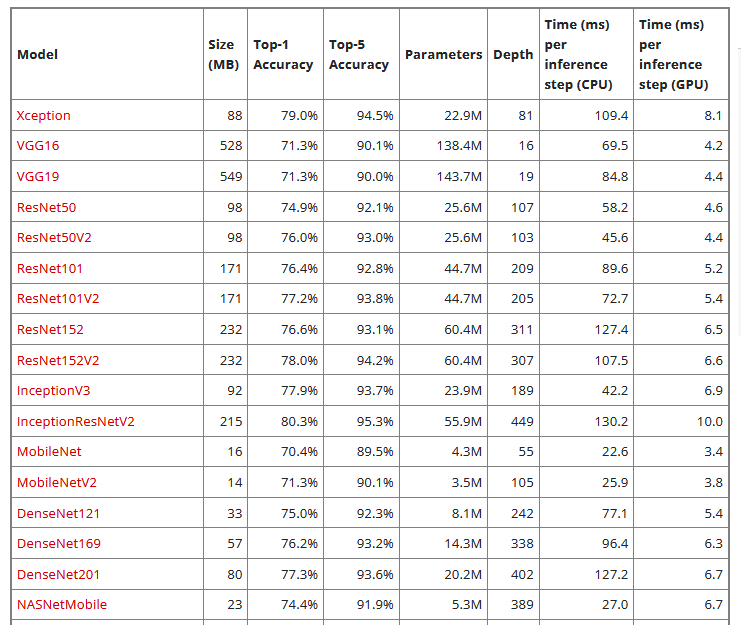

In [31]:
class AdvancedCVModel:
    
    @staticmethod
    def build(neural_model, inputShape, classes):
    
        if neural_model == 'Xception':
            model = Xception(weights = weights, include_top=False, input_shape = inputShape)
        elif neural_model == 'VGG16': 
            model = VGG16(weights = weights, include_top=False, input_shape = inputShape)
        elif neural_model == 'VGG19':
            model = VGG19(weights = weights, include_top=False, input_shape = inputShape)
        elif neural_model == 'ResNet50':
            model = ResNet50(weights = weights, include_top=False, input_shape = inputShape)
        elif neural_model == 'MobileNet':
            model = MobileNet(weights = weights, include_top=False, input_shape = inputShape)
        elif neural_model == 'InceptionResNetV2':
            model = InceptionResNetV2(weights = weights, include_top=False, input_shape = inputShape)
        #elif neural_model == 'NASNetLarge':
        #    model = NASNetLarge(weights = weights, include_top=False, input_shape = inputShape)

        # return the constructed network architecture
        return model

# Model Selection and Initializations (i.e. proxy settings, weights to imagenet, etc.) 

In [32]:
if neural_model == 'ResNet50' or neural_model == 'VGG16' or neural_model == 'MobileNet' or neural_model == 'VGG19': 
    height = 32
    width = 32
    inputShape = (height, width, depth)
elif neural_model == 'InceptionResNetV2' or neural_model == 'Xception': 
    height = 75
    width = 75
    inputShape = (height, width, depth)

if pre_trained == True:
    weights = 'imagenet'
else:    
    weights = None

if proxy == True:
    os.environ["https_proxy"] = proxy_server    # Set proxy

# Set CPU or GPU type
gpu = True
gpu_id = "0"
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  
if gpu == False: 
    os.environ["CUDA_VISIBLE_DEVICES"] = ""
else: 
    os.environ["CUDA_VISIBLE_DEVICES"] = gpu_id

# Datasets Download

In [33]:
#download mnist data and split into train and test sets
(X, y), (X_test, y_test) = cifar10.load_data()

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20)

# Resize image arrays
X_train = resize_image_arr(X_train, height, width)
X_val = resize_image_arr(X_val, height, width)
X_test = resize_image_arr(X_test, height, width)

# Datasets Visualization

In [34]:
if show_dataset == True:
    plt.imshow(array_to_img(X_train[0]))
    plt.savefig("first_resized_cifar10_mnist_train_image.jpg")
    print("First cifar10 mnist train image", y_train[0][0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()

    # Show the first image from the test set
    plt.imshow(array_to_img(X_test[0]))
    plt.savefig("first_resized_cifar10_mnist_test_image.jpg")
    print("First fashion mnist test image", y_test[0][0])
    plt.show(block = False)
    plt.pause(3)
    plt.close()

# Data Preparation

In [35]:
# Normalize the data
X_train = X_train.astype(data_type)
X_val = X_val.astype(data_type)
X_test = X_test.astype(data_type)
X_train /= 255
X_val /= 255
X_test /= 255

# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Model Definition and Compiling

**GlobalAveragePooling2D**: 

Global average pooling operation for spatial data.

In [36]:
# create the base pre-trained model
base_model = AdvancedCVModel.build(neural_model, inputShape, 10)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 10 classes
predictions = Dense(10, activation='softmax')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
if full_model_trainable == False: 
    for layer in base_model.layers:
        layer.trainable = False

17235968/17225924 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 16, 16, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 16, 16, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 16, 16, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 16, 16, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 16, 16, 32)       128  

# Definition of all Callbacks

In [37]:
# compile the model (should be done *after* setting layers to non-trainable)
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

checkPoint=ModelCheckpoint("advanced_cifar10.cnn", save_weights_only=True, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
default_callbacks = default_callbacks+[checkPoint]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# Data Augmentation and Training

Data augmentation represents a range of techniques used to generate “new” training data from the original training set by applying random jitters and perturbations (but at the same time ensuring that the class labels of the data are not changed). In general these perturbations are obtain via affine transformations. 

Let see some of Affine Transformations for Data Augmentation:

**Horizontal and Vertical Shift Augmentation**

Shift means moving all pixels of the image along one axis (x-axis or y-axis) towards one direction, such as horizontally or vertically, while keeping the image dimensions the same.

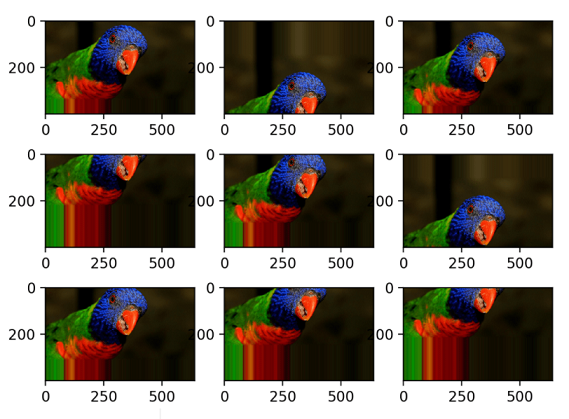

**Random Zoom Augmentation**

Zoom data augmentation randomly zooms the image in and either adds new pixel values around the image or interpolates pixel values respectively.

**ImageDataGenerator**
 
Sometimes there is no much data for computer vision models or we need to generalize models on images deformations. In this case we can adopt **ImageDataGenerator** class.

ImageDataGenerator lets you augment your images in real-time while your model is still training! You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory! 

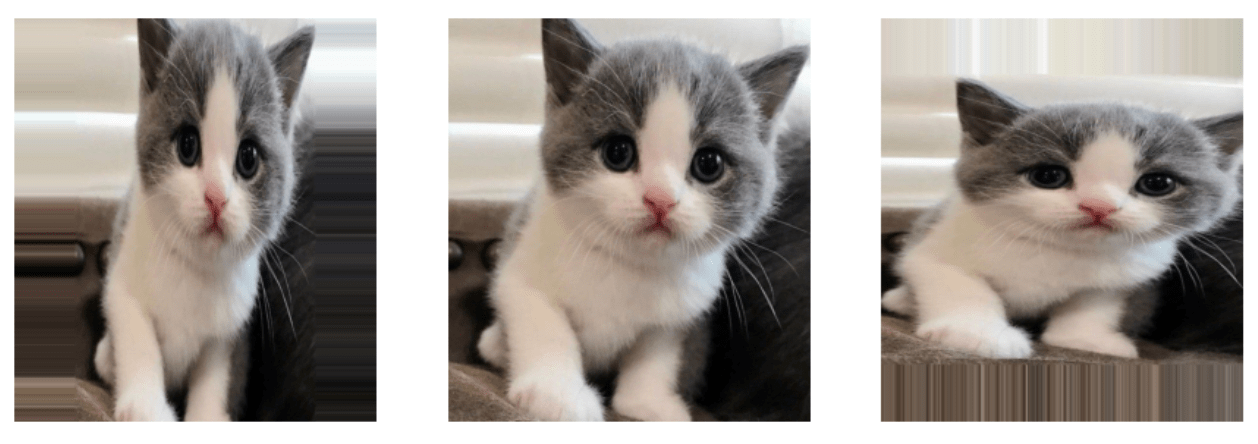

**other options:**
 
featurewise_std_normalization=False, 

samplewise_std_normalization=False,

rotation_range=0, 

brightness_range=None, 

shear_range=0.0, 

zoom_range=0.0,

channel_shift_range=0.0, 

fill_mode='nearest', cval=0.0,

rescale=None,

In [ ]:
# Train the model, iterating on the data in batches
if data_augmentation == False: 
	history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_val, y_val), callbacks = default_callbacks, verbose = 2)
else:
	datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip = True, vertical_flip = True, rotation_range = 30)                                   

	history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), steps_per_epoch = X_train.shape[0]/batch_size, epochs = epochs, validation_data = (X_val, y_val), callbacks = default_callbacks, verbose = 2)

score = model.evaluate(X_test, y_test, batch_size=16)
print(score)

Epoch 1/100
5000/5000 - 137s - loss: 1.9753 - accuracy: 0.2976 - val_loss: 1.7251 - val_accuracy: 0.3226 - 137s/epoch - 27ms/step
Epoch 2/100
5000/5000 - 130s - loss: 1.7394 - accuracy: 0.3641 - val_loss: 2.2150 - val_accuracy: 0.1843 - 130s/epoch - 26ms/step
Epoch 3/100


**Homework**

1) Write a model for image classification in keras for cifar100 adopting one of keras-built-in models

2) Make data exploration  

3) Try to achieve the best accuracy ever, adopting data augmentations and all the regularizations you believe are useful 

4) Try to add Dropout and Batchnormalization on the final fully connected layers in order to reduce overfitting

5) Save the best model and reaload the best from another program .py to test the model on test set and to check it works on an example image